In [1]:
from expert import topics

In [2]:
import glob, os
import pandas as pd
import numpy as np
import scipy.sparse as ss
from corextopic import corextopic as ct
from langdetect import detect_langs, detect
import time
import json
import pickle
import networkx as nx

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# load data
fn = 'example_data/Arxiv_sample/Arxiv_Nodes_Paper.jsonl'
df = pd.read_json(fn, lines=True)[['abstract']]
df.head()

,abstract
0,We use three domain wall simulations from the ...
1,A mechanical model of swimming and flying in a...
2,"Modern structural biology relies on NMR, X-ray..."
3,We report on the observation of cooperative ra...
4,We report a systematic study of nuclear matrix...


In [4]:
# specify path to save topic modelling output
path = './test_output'
tm = topics.TopicModeler(df,text_col='abstract',
                         max_vocab=10000,max_ngram=3, 
                         output_path = os.path.abspath(f'{path}'))

Fitting topic model for n=5
Fit in 0.36862787008285525 minutes


/Users/glen075/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/glen075/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/glen075/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


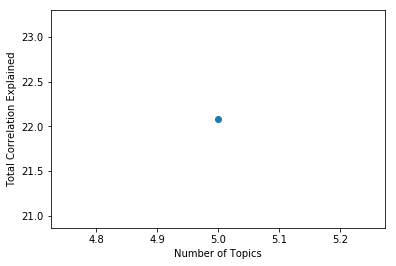

Fitting topic model for n=10
Fit in 0.27071446577707925 minutes


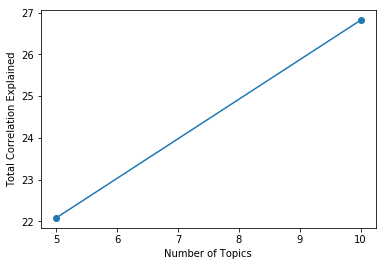

In [5]:
# fit the topic model using N topics, starting from n_min and going until n_max using a step size of n_step
tm.find_best_n(n_min=5,n_max=10,n_step=5)

Fitting topic model for n=7
Fit in 0.2885654846827189 minutes


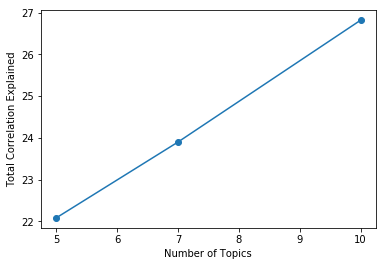

Fitting topic model for n=9
Fit in 0.3898910959561666 minutes


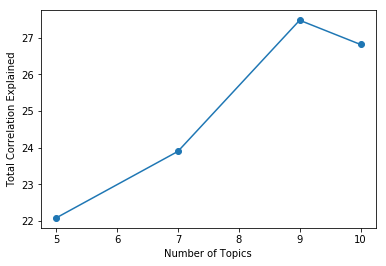

In [6]:
tm.find_best_n(n_min=7,n_max=9,n_step=2)

In [7]:
# Summarize the results of the topic modeling using various n
tm.results

,n,corr_explained,time_elapsed
0,5,22.080954,0.368628
2,7,23.898315,0.288565
3,9,27.480656,0.389891
1,10,26.818433,0.270714


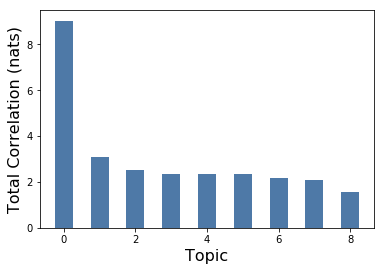

In [8]:
# Plot the correlation explained by each topic, using the optimal N identified above
tm.plot_correlation()

In [9]:
# print topics, using the optimal N identified above
tm.print_topics()

1: accepted,mnras,star,accepted publication,stellar,publication,observations,galaxy,galaxies,apj
2: collisions,lhc,qcd,international,quark,hadron,proceedings,heavyion,production,transverse momentum
3: performance,methods,computational,method,algorithm,detector,design,learning,algorithms,applications
4: equations,equation,hydrodynamic,fluid,solutions,theory,dynamics,numerical,hydrodynamics,solution
5: black,black hole,hole,gravitational,black holes,holes,dark,universe,dark matter,cosmological
6: nuclear,radiation,nuclei,neutron,calculations,phys rev,rev,phys,nuclear matter,reactions
7: pages figures,figures,comment pages figures,pages,comment pages,comment,pages figures tables,figures tables,tables,comment pages figure
8: laser,magnetic,magnetic resonance,resonance,nuclear magnetic,nuclear magnetic resonance,electron,spin,nmr,electronic
9: version,published version,published,added,text overlap,admin,admin note,arxiv admin,arxiv admin note,overlap arxiv


0
Saving /Users/glen075/OneDrive - PNNL/MyProjects/EXPERT/experttoolkit/examples/test_output/wordcloud_0.png


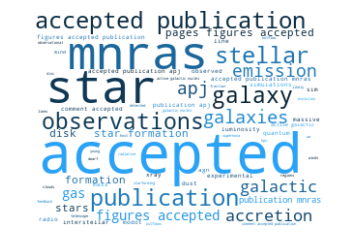

1
Saving /Users/glen075/OneDrive - PNNL/MyProjects/EXPERT/experttoolkit/examples/test_output/wordcloud_1.png


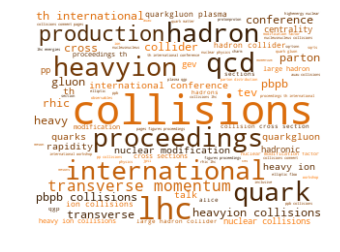

2
Saving /Users/glen075/OneDrive - PNNL/MyProjects/EXPERT/experttoolkit/examples/test_output/wordcloud_2.png


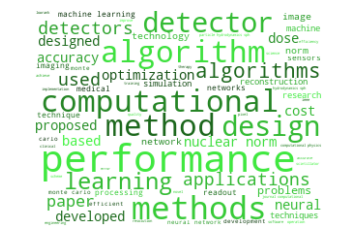

3
Saving /Users/glen075/OneDrive - PNNL/MyProjects/EXPERT/experttoolkit/examples/test_output/wordcloud_3.png


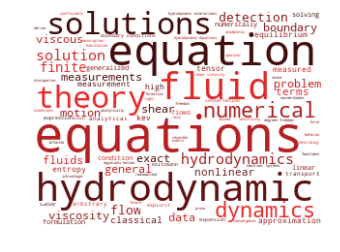

4
Saving /Users/glen075/OneDrive - PNNL/MyProjects/EXPERT/experttoolkit/examples/test_output/wordcloud_4.png


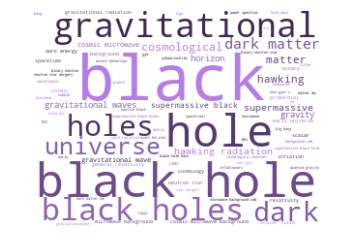

5
Saving /Users/glen075/OneDrive - PNNL/MyProjects/EXPERT/experttoolkit/examples/test_output/wordcloud_5.png


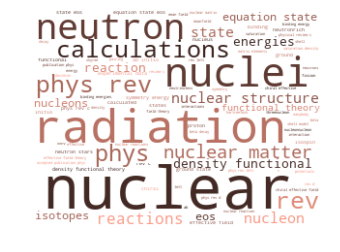

6
Saving /Users/glen075/OneDrive - PNNL/MyProjects/EXPERT/experttoolkit/examples/test_output/wordcloud_6.png


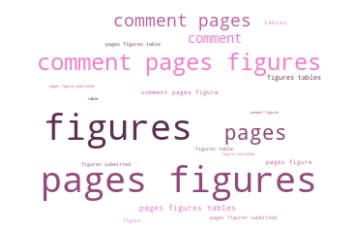

7
Saving /Users/glen075/OneDrive - PNNL/MyProjects/EXPERT/experttoolkit/examples/test_output/wordcloud_7.png


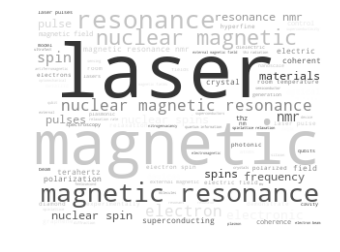

8
Saving /Users/glen075/OneDrive - PNNL/MyProjects/EXPERT/experttoolkit/examples/test_output/wordcloud_8.png


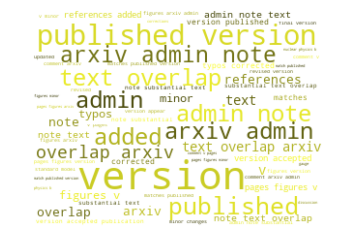

In [10]:
# print wordclouds for each of the topics, using the optimal N identified above
tm.plot_wordclouds(save_fig=True)

In [11]:
# generate and save the topic cooccurence graph
tm.topic_corr_graph(engine='dot',scale_vis_edge_weight=10.0)

Saving /Users/glen075/OneDrive - PNNL/MyProjects/EXPERT/experttoolkit/examples/test_output/topic_cooccur_graph


In [12]:
# use set_model=True to override using the model with the best correlation
tm.fit_model(n_topics=8,set_model=True)

Fitting topic model for n=8


Saving /Users/glen075/OneDrive - PNNL/MyProjects/EXPERT/experttoolkit/examples/test_output/correlation_by_topic.png


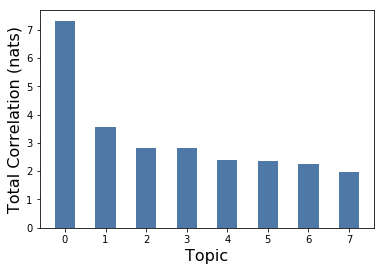

In [13]:
# Plot the correlation explained by each topic, using the N set using the fit_model call in the cell above
tm.plot_correlation(save_fig=True)